In [1]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns #설치 필요
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cd /Users/Soul.C/data/instacart

/Users/Soul.C/data/instacart


In [3]:
aisles = pd.read_csv('aisles.csv', engine='c')
print('Total aisles: {}'.format(aisles.shape[0]))
aisles.head()

Total aisles: 134


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
departments = pd.read_csv('departments.csv', engine='c')
print('Total departments: {}'.format(departments.shape[0]))
departments.head()

Total departments: 21


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
products = pd.read_csv('products.csv', engine='c')
print('Total products: {}'.format(products.shape[0]))
products.head(5)

Total products: 49688


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
goods = pd.merge(left=pd.merge(left=products, right=departments, how='left'), 
                 right=aisles, how='left')
goods.shape

(49688, 6)

In [9]:
goods.head(10)

,product_id,product_name,aisle_id,department_id,department,frozen,other,bakery,produce,alcohol,...,pantry,breakfast,canned.goods,dairy.eggs,household,babies,snacks,deli,missing,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,marinades meat preparation
5,6,Dry Nose Oil,11,11,personal care,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,cold flu allergy
6,7,Pure Coconut Water With Orange,98,7,beverages,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,juice nectars
7,8,Cut Russet Potatoes Steam N' Mash,116,1,frozen,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,frozen produce
8,9,Light Strawberry Blueberry Yogurt,120,16,dairy eggs,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,yogurt
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,beverages,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,water seltzer sparkling water


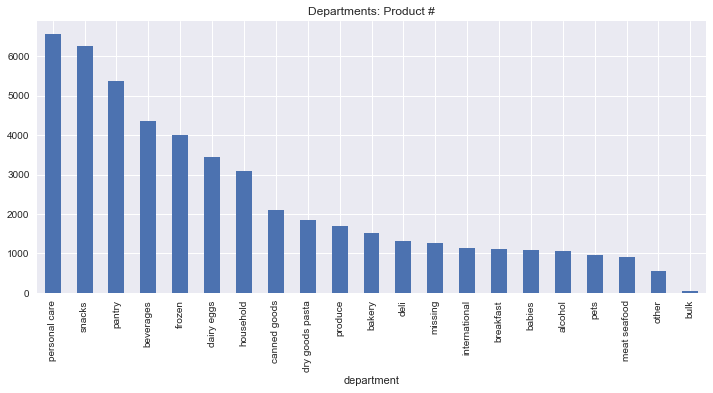

In [33]:
plt.figure(figsize=(12, 5))
goods.groupby(['department']).count()['product_id'].copy()\
.sort_values(ascending=False).plot(kind='bar', 
                                   #figsize=(12, 5), 
                                   title='Departments: Product #')

In [7]:
op_train = pd.read_csv('order_products__train.csv', engine='c')
print('Total ordered products(train): {}'.format(op_train.shape[0]))
op_train.head(50)

Total ordered products(train): 1384617


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [9]:
op_prior = pd.read_csv('order_products__prior.csv', engine='c')
print('Total ordered products(prior): {}'.format(op_prior.shape[0]))
op_prior.head()

Total ordered products(prior): 32434489


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [11]:
orders = pd.read_csv('orders.csv', engine='c',)
print('Total orders: {}'.format(orders.shape[0]))
orders.sort_values(['order_id']).head(5)

Total orders: 3421083


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0
2958007,4,178520,prior,36,1,9,7.0
2593373,5,156122,prior,42,6,16,9.0


In [10]:
orders.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
train = pd.merge(left=op_prior,right=orders,how='left',on='order_id')

In [14]:
val = pd.merge(left=op_train,right=orders,how='left',on='order_id')

NameError: name 'op_train' is not defined

In [13]:
# order_details_trains = pd.merge(left=order_details_train,
#                 right=goods[['product_id', 
#                              'aisle_id', 
#                              'department_id']],
#                 how='left',
#                 on='product_id'
# )

In [14]:
# order_details_trains = pd.merge(left=order_details_prior,
#                 right=goods[['product_id', 
#                              'aisle_id', 
#                              'department_id']],
#                 how='left',
#                 on='product_id'
# )

In [19]:
train.eval_set.describe()

count     20641991
unique           1
top          prior
freq      20641991
Name: eval_set, dtype: object

In [13]:
#val.drop('eval_set',axis=1, inplace=True)
train.drop('eval_set', axis=1, inplace=True)

In [15]:
#cols = train.columns.tolist()
#실행하면 이름 바뀐 컬럼의 값이 다 NaN됨 ;; 
"""
cols = ['order_id',
        'user_id',
        'product_id',
         'add_to_cart_order',
         'order_number',
         'order_dow',
         'order_hour_of_day',
         'days_since_prior_order',
         'reordered']
train = train.reindex(columns=cols)
"""

"\ncols = ['order_id',\n        'user_id',\n        'product_id',\n         'add_to_cart_order',\n         'order_number',\n         'order_dow',\n         'order_hour_of_day',\n         'days_since_prior_order',\n         'reordered']\ntrain = train.reindex(columns=cols)\n"

In [20]:
train.drop('Unnamed: 0_x',axis=1, inplace=True)
# train.drop('Unnamed: 0_y',axis=1, inplace=True)

In [20]:
train.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.00
1,2,28985,2,1,202279,prior,3,5,9,8.00
2,2,9327,3,0,202279,prior,3,5,9,8.00
3,2,45918,4,1,202279,prior,3,5,9,8.00
4,2,30035,5,0,202279,prior,3,5,9,8.00


In [16]:
pd.options.display.float_format = '{:,.2f}'.format

### Royal

In [14]:
#가입한지 오래된 유저들 
oldUsers = train[['user_id','order_id','days_since_prior_order']].\
drop_duplicates().\
groupby(['user_id'],as_index=False).\
sum()

In [15]:
oldUsers.rename(index=str, columns={'days_since_prior_order':'joined_since'},inplace=True)

In [16]:
oldUsers.drop('order_id',axis=1,inplace=True)

In [17]:
oldUsers.head(10)

,user_id,joined_since
0,1,176.0
1,2,198.0
2,3,133.0
3,4,55.0
4,5,40.0
5,6,18.0
6,7,203.0
7,8,60.0
8,9,36.0
9,10,79.0


In [39]:
check_old = merged[['user_id','joined_since','reordered']].groupby('user_id',as_index=False).\
mean().sort_values('reordered',ascending=False)

In [41]:
(check_old['joined_since']).corr(check_old['reordered'])

0.66654675363427673

In [ ]:
#royalUsers

In [18]:
royalUsers = train[['user_id','order_number']].\
groupby(['user_id'],as_index=False).mean()
royalUsers.head()

,user_id,order_number
0,1,5.813559
1,2,8.035897
2,3,6.000000
3,4,2.888889
4,5,2.486486


In [19]:
royalUsers.rename(index=str, columns={'order_number':'order_num_mean'},inplace=True)

In [20]:
#oldXroyal  하려고 합치기
royal = pd.merge(left=oldUsers, right=royalUsers, how='left', on='user_id')
royal.head(10)

,user_id,joined_since,order_num_mean
0,1,176.0,5.813559
1,2,198.0,8.035897
2,3,133.0,6.000000
3,4,55.0,2.888889
4,5,40.0,2.486486
5,6,18.0,1.928571
6,7,203.0,9.645631
7,8,60.0,1.836735
8,9,36.0,2.065789
9,10,79.0,3.223776


In [21]:
royal['royal'] = royal['joined_since']*royal['order_num_mean']

In [22]:
royal.head()

,user_id,joined_since,order_num_mean,royal
0,1,176.0,5.813559,1023.186441
1,2,198.0,8.035897,1591.107692
2,3,133.0,6.000000,798.000000
3,4,55.0,2.888889,158.888889
4,5,40.0,2.486486,99.459459


In [23]:

royal.drop('joined_since',axis=1,inplace=True)


In [24]:
#file
royal.to_csv('royal.csv')

In [44]:
merged = pd.merge(left=train, right=royal, how='left', on='user_id')
merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,joined_since,order_num_mean,royal
0,2,33120,1,1,202279,3,5,9,8.00,151.00,4.77,719.77
1,2,28985,2,1,202279,3,5,9,8.00,151.00,4.77,719.77
2,2,9327,3,0,202279,3,5,9,8.00,151.00,4.77,719.77
3,2,45918,4,1,202279,3,5,9,8.00,151.00,4.77,719.77
4,2,30035,5,0,202279,3,5,9,8.00,151.00,4.77,719.77


### prd_cnt 

In [17]:
prd_cnt = train.groupby(['product_id']).size().reset_index(name='prd_cnt')

In [18]:
reorder_prob_prd_cnt = pd.merge(left=prd_cnt, right=train,
                                  on=['product_id'])

In [26]:
prd_cnt_check = reorder_prob_prd_cnt[['prd_cnt','reordered']].groupby(['prd_cnt'],as_index=False).\
mean().sort_values(by='reordered',ascending=False)

In [20]:
import scipy.stats

In [27]:
x = prd_cnt_check['prd_cnt']
y = prd_cnt_check['reordered']

print (scipy.stats.spearmanr(x,y))


SpearmanrResult(correlation=0.51305445181648557, pvalue=2.1859220647431344e-222)


In [28]:
(x).corr(y)

0.27720812166388403

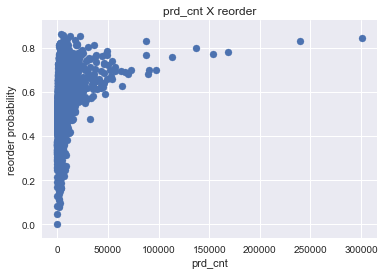

In [29]:
plt.scatter(x,y)
plt.ylabel('reorder probability')
plt.xlabel('prd_cnt')
plt.title('prd_cnt X reorder')
plt.show()

### us_prd_cnt 
######  한 유저가 주문한 제품 별 개수 

In [20]:
up_cnt = train.groupby(['user_id', 'product_id']).size().reset_index(name='us_prd_cnt')

In [14]:
up_cnt.head(10)

,user_id,product_id,us_prd_cnt
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3
5,1,13176,2
6,1,14084,1
7,1,17122,1
8,1,25133,8
9,1,26088,2


In [27]:
up_cnt.groupby(['user_id','product_id']).sort_values('us_prd_cnt',ascending=False)

AttributeError: Cannot access callable attribute 'sort_values' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [25]:
a.head(30)

,user_id,product_id,us_prd_cnt
9158533,141736,25133,99
2657275,41356,38652,99
1154185,17997,4210,99
2657218,41356,6583,99
2657236,41356,14366,99
6709529,103593,28204,98
7829057,120897,12013,98
2657260,41356,29671,98
5468261,84478,31981,97
6459543,99707,24852,97


In [15]:
#유저 별로 구매한 총 제품 수 구하기 
user_cnt = train.groupby(['user_id']).size().reset_index(name='us_cnt')
user_cnt.head(10)

,user_id,us_cnt
0,1,59
1,2,195
2,3,88
3,4,18
4,5,37
5,6,14
6,7,206
7,8,49
8,9,76
9,10,143


In [51]:
us_prd = pd.merge(left=up_cnt, right=user_cnt, on='user_id')
us_prd.head()

,user_id,product_id,us_prd_cnt,us_cnt
0,1,196,10,59
1,1,10258,9,59
2,1,10326,1,59
3,1,12427,10,59
4,1,13032,3,59


In [33]:
reorder_prob_us_prd_cnt = pd.merge(left=us_prd, right=train,
                                  on=['user_id','product_id'])

In [91]:
reorder_prob_us_prd_cnt['us_cnt'].describe()

count   32,434,489.00
mean           422.41
std            378.85
min              3.00
25%            142.00
50%            307.00
75%            594.00
max          3,725.00
Name: us_cnt, dtype: float64

In [67]:
check0 = reorder_prob_us_prd_cnt[['normalorders_us_prd_cnt','reordered']].groupby(['normalorders_us_prd_cnt'],as_index=False).\
mean().\
sort_values(by='reordered',ascending=False)

In [66]:
check0.head(30)

,normalorders_us_prd_cnt,reordered
0,False,0.99
1,True,0.59


In [55]:
check1 = reorder_prob_us_prd_cnt[['us_prd_cnt','reordered']].groupby(['us_prd_cnt'],as_index=False).\
mean().\
sort_values(by='reordered',ascending=False)

In [56]:
(check1['us_prd_cnt']).corr(check1['reordered'])

0.48138992511367262

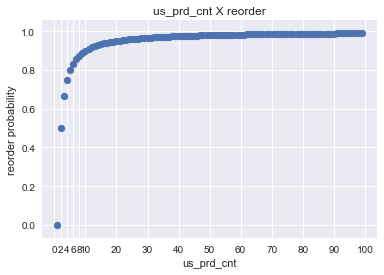

In [87]:
ticks = [0,2,4,6,8,10,20,30,40,50,60,70,80,90,100]
plt.scatter(check1['us_prd_cnt'],check1['reordered'])
plt.ylabel('reorder probability')
plt.xlabel('us_prd_cnt')
plt.xticks(ticks)
plt.title('us_prd_cnt X reorder')
plt.show()

In [45]:
check2 = reorder_prob_us_prd_cnt[['us_cnt','reordered']].groupby(['us_cnt'],as_index=False).\
mean().\
sort_values(by='reordered',ascending=False)

In [46]:
(check2['us_cnt']).corr(check2['reordered'])

0.80542598813140076

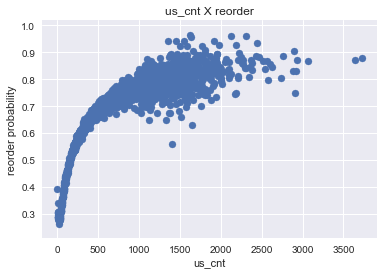

In [89]:
plt.scatter(check2['us_cnt'],check2['reordered'])
plt.ylabel('reorder probability')
plt.xlabel('us_cnt')
plt.title('us_cnt X reorder')
plt.show()

### Format

In [93]:
pd.options.display.float_format = '{:,.2f}'.format

### us_prd_rate 
###### 한 유저가 총 주문한 양 대비 각 제품의 비율 (총100중에 몇퍼가 해당 제품인가)

In [52]:
#한 유저가 총 주문한 양 대비 각 제품의 비율 (총100중에 몇퍼가 해당 제품인가)
us_prd['us_prd_rate'] = (us_prd['us_prd_cnt'])/(us_prd['us_cnt'])
us_prd.head()

,user_id,product_id,us_prd_cnt,us_cnt,us_prd_rate
0,1,196,10,59,0.17
1,1,10258,9,59,0.15
2,1,10326,1,59,0.02
3,1,12427,10,59,0.17
4,1,13032,3,59,0.05


In [19]:
# train1 = train[['user_id','product_id','order_number','order_id']]

In [54]:
us_prd_merged = pd.merge(left=merged,right=us_prd, on=['user_id','product_id'])

In [55]:
us_prd_merged.shape

(20641991, 15)

In [60]:
us_prd_merged1 = pd.merge(left=merged,right=us_prd, on=['user_id'])

MemoryError: 

In [61]:
us_prd_merged.head(15)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,joined_since,order_num_mean,royal,us_prd_cnt,us_cnt,us_prd_rate
0,2,33120,1,1,202279,3,5,9,8.00,151.00,4.77,719.77,5,90,0.06
1,104690,33120,2,1,202279,8,6,10,30.00,151.00,4.77,719.77,5,90,0.06
2,132412,33120,1,1,202279,6,5,9,30.00,151.00,4.77,719.77,5,90,0.06
3,2808715,33120,1,1,202279,5,5,13,9.00,151.00,4.77,719.77,5,90,0.06
4,2894949,33120,5,0,202279,1,5,9,nan,151.00,4.77,719.77,5,90,0.06
5,2,28985,2,1,202279,3,5,9,8.00,151.00,4.77,719.77,5,90,0.06
6,132412,28985,7,1,202279,6,5,9,30.00,151.00,4.77,719.77,5,90,0.06
7,1500071,28985,1,1,202279,2,4,13,20.00,151.00,4.77,719.77,5,90,0.06
8,2808715,28985,2,1,202279,5,5,13,9.00,151.00,4.77,719.77,5,90,0.06
9,2894949,28985,4,0,202279,1,5,9,nan,151.00,4.77,719.77,5,90,0.06


In [23]:
check3 = us_prd_merged[['us_prd_rate','reordered']].groupby(['us_prd_rate'],as_index=False).\
mean().\
sort_values(by='reordered',ascending=False)
check3

,us_prd_rate,reordered
36048,0.080162,0.989899
34644,0.069160,0.989796
40027,0.172232,0.989796
36723,0.086840,0.989691
39939,0.167530,0.989691
40857,0.256614,0.989691
41440,0.502618,0.989583
41547,0.662069,0.989583
35774,0.077733,0.989583
34321,0.067043,0.989474


In [24]:
(check3['us_prd_rate']).corr(check3['reordered'])

0.21470853611253587

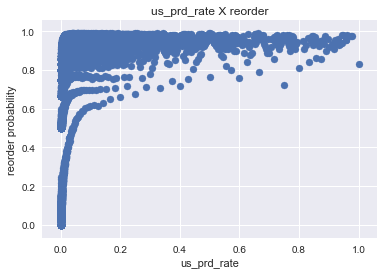

In [25]:
plt.scatter(check3['us_prd_rate'],check3['reordered'])
plt.ylabel('reorder probability')
plt.xlabel('us_prd_rate')
plt.title('us_prd_rate X reorder')
plt.show()

#### us_prd_longago 
###### 한 유저가 각 제품을 마지막으로 사고 나서 몇 번의 주문이 지났는가, 얼마나 오래 되었는가 
###### (10번의 주문을 한 유저가 바나나를 가장 최근에 산 주문이 7번째 주문이라면 값은 3, 숫자 클수록 주문한지 오래됨)

In [62]:
#한 유저가 각 제품을 마지막으로 산 주문은 몇 번째 주문이었나 구하기
us_prd_max = us_prd_merged.groupby(['user_id','product_id'])['order_number'].max().reset_index(name='us_prd_last_order')

In [63]:
#각 유저당 총 몇 번의 주문을 했는가를 한 표에 가져다 붙이기 
a = train.groupby(['user_id'])['order_number'].max().reset_index(name='us_last_order')
us_prd1 = pd.merge(us_prd_max, a, on='user_id')
us_prd1.head(5)

,user_id,product_id,us_prd_last_order,us_last_order
0,1,196,10,10
1,1,10258,10,10
2,1,10326,5,10
3,1,12427,10,10
4,1,13032,10,10


In [28]:
#컬럼이름 정리 
#us_prd.drop('us_last_order_x',axis=1,inplace=True)
# us_prd1.rename(index=str, columns={'us_last_order_y':'us_last_order'}, inplace=True)

In [64]:
us_prd1['us_prd_longago'] = (us_prd1['us_last_order']) - (us_prd1['us_prd_last_order'])

In [65]:
#값 확인해 보면 가장 최근 주문까지 해당 제품을 산 경우 값이 0 이 됨. 1을 더해줄까 ?상관없나 ?
us_prd1.head(5)

,user_id,product_id,us_prd_last_order,us_last_order,us_prd_longago
0,1,196,10,10,0
1,1,10258,10,10,0
2,1,10326,5,10,5
3,1,12427,10,10,0
4,1,13032,10,10,0


In [66]:
us_prd_merged1 = pd.merge(us_prd_merged, us_prd1, on=['user_id','product_id'])

In [67]:
us_prd_merged1.head(3)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,joined_since,order_num_mean,royal,us_prd_cnt,us_cnt,us_prd_rate,us_prd_last_order,us_last_order,us_prd_longago
0,2,33120,1,1,202279,3,5,9,8.00,151.00,4.77,719.77,5,90,0.06,8,8,0
1,104690,33120,2,1,202279,8,6,10,30.00,151.00,4.77,719.77,5,90,0.06,8,8,0
2,132412,33120,1,1,202279,6,5,9,30.00,151.00,4.77,719.77,5,90,0.06,8,8,0


In [76]:
us_prd_merged1.shape

(20641991, 18)

In [75]:
us_prd_merged1.to_csv('us_prd_merged1.csv')

#### us_prd_constancy 
###### 한 유저가 어떤 제품을 처음으로 주문하고 나서, 이후 주문들에 얼마나 꾸준히 재구매해왔는가 : 그 제품을 꾸준히 사왔을 수록 값이 큼 
###### (2번 째 주문에 바나나를 처음 사기 시작한 유저가 10번의 주문을 하는 동안 바나나를 3번 샀다면 3/10-2+1 = 1/3) 


In [3]:
us_prd_merged1 = pd.read_csv('us_prd_merged1.csv')

In [48]:
del us_prd_merged1

In [4]:
#한 유저가 각 제품을 처음으로 산 주문은 몇 번째 주문이었나 구하기
a= us_prd_merged1.groupby(['user_id','product_id'])['order_number'].min().reset_index(name='us_prd_first_order')

In [5]:
a.head()

,user_id,product_id,us_prd_first_order
0,1,196,1
1,1,10258,2
2,1,10326,5
3,1,12427,1
4,1,13032,2


In [6]:
us_prd_merged2 = pd.merge(us_prd_merged1, a, on=['user_id','product_id'])

In [7]:
us_prd_merged2['us_prd_constancy'] = us_prd_merged2['us_prd_cnt'] /  ((us_prd_merged2['us_prd_cnt'] -us_prd_merged2['us_prd_first_order'])+1)

In [8]:
us_prd_merged2.head(4)

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,...,order_num_mean,royal,us_prd_cnt,us_cnt,us_prd_rate,us_prd_last_order,us_last_order,us_prd_longago,us_prd_first_order,us_prd_constancy
0,0,2,33120,1,1,202279,3,5,9,8.0,...,4.766667,719.766667,5,90,0.055556,8,8,0,1,1.0
1,1,104690,33120,2,1,202279,8,6,10,30.0,...,4.766667,719.766667,5,90,0.055556,8,8,0,1,1.0
2,2,132412,33120,1,1,202279,6,5,9,30.0,...,4.766667,719.766667,5,90,0.055556,8,8,0,1,1.0
3,3,2808715,33120,1,1,202279,5,5,13,9.0,...,4.766667,719.766667,5,90,0.055556,8,8,0,1,1.0


### order number

In [22]:
 check5 = train[['order_number','reordered']].groupby(['order_number'],as_index=False).\
mean().sort_values(by='reordered',ascending=False)

In [23]:
check5.head(10)

,order_number,reordered
92,93,0.86
91,92,0.86
94,95,0.86
87,88,0.85
97,98,0.85
88,89,0.85
96,97,0.85
86,87,0.85
93,94,0.85
82,83,0.85


In [24]:
(check5['order_number']).corr(check5['reordered'])

0.70596972481336007

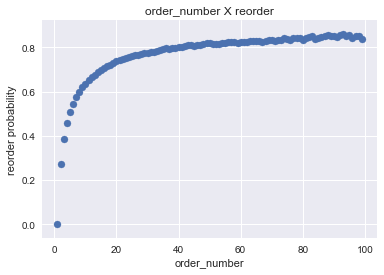

In [25]:
plt.scatter(check5['order_number'],check5['reordered'])
plt.ylabel('reorder probability')
plt.xlabel('order_number')
plt.title('order_number X reorder')
plt.show()

### distinct_items 

In [9]:
users = pd.DataFrame()

In [11]:
users['total_items'] = us_prd_merged2.groupby('user_id').size()

In [12]:
users['all_products'] = us_prd_merged2.groupby('user_id')['product_id'].apply(set)

In [13]:
users['total_distinct_items'] = (users.all_products.map(len))

In [14]:
users.drop('all_products',axis=1,inplace=True)

In [15]:
users.drop('total_items',axis=1,inplace=True)

In [16]:
users.head()

,total_distinct_items
user_id,
1,18
2,102
5,23
7,68
8,36


In [17]:
us_prd_merged2 = us_prd_merged2.merge(users, left_on='user_id', right_index=True)

In [46]:
us_prd_merged2.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,...,royal,us_prd_cnt,us_cnt,us_prd_rate,us_prd_last_order,us_last_order,us_prd_longago,us_prd_first_order,us_prd_constancy,total_distinct_items
0,0,2,33120,1,1,202279,3,5,9,8.0,...,719.766667,5,90,0.055556,8,8,0,1,1.0,47
1,1,104690,33120,2,1,202279,8,6,10,30.0,...,719.766667,5,90,0.055556,8,8,0,1,1.0,47
2,2,132412,33120,1,1,202279,6,5,9,30.0,...,719.766667,5,90,0.055556,8,8,0,1,1.0,47
3,3,2808715,33120,1,1,202279,5,5,13,9.0,...,719.766667,5,90,0.055556,8,8,0,1,1.0,47
4,4,2894949,33120,5,0,202279,1,5,9,NaN,...,719.766667,5,90,0.055556,8,8,0,1,1.0,47


In [50]:
us_prd_merged2.to_csv('us_prd_merged2.csv')

### departments

In [49]:
us_prd_merged2 = us_prd_merged2.merge(goods, on='product_id')

MemoryError: 

###  리오더율 높은  Top10  제품

In [32]:
top_prd = train[['product_id','reordered']].groupby(['product_id'],as_index=False).mean().sort_values(by='reordered',ascending=False)
top_prd.head(10)

,product_id,reordered
6430,6433,0.941176
2074,2075,0.931034
43545,43553,0.923077
27734,27740,0.920792
14605,14609,0.914286
13871,13875,0.911111
39984,39992,0.909091
5865,5868,0.900000
31412,31418,0.900000
35598,35604,0.900000


In [33]:
a = pd.read_csv('top10.csv')

In [12]:
a.head()

,Unnamed: 0,product_id,product_name,Sea Salt Melba Snacks,Classic Cheddar Popcorn,Organic White Nectarine,Organic Coconut Yogurt,Blackberry Ginger Ale,Gluten Free Broccoli and Kale Lasagna,Citrus Chia Power Snacks,Organic Dill,Rising Crust Italian Sausage Pizza,Cookie Thins Cake Batter
0,1,1,Chocolate Sandwich Cookies,0,0,0,0,0,0,0,0,0,0
1,2,2,All-Seasons Salt,0,0,0,0,0,0,0,0,0,0
2,3,3,Robust Golden Unsweetened Oolong Tea,0,0,0,0,0,0,0,0,0,0
3,4,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,0,0,0,0,0,0,0,0,0,0
4,5,5,Green Chile Anytime Sauce,0,0,0,0,0,0,0,0,0,0


In [34]:
a.drop('Unnamed: 0',axis=1,inplace=True)

In [35]:
a.drop('product_id',axis=1,inplace=True)

### order_hour_of_day 
###### r에서 처리해서 csv  로 읽어옴 

In [36]:
b = pd.read_csv('order_hour_of_day.csv')

In [37]:
b.drop('Unnamed: 0',axis=1,inplace=True)

In [38]:
b.head(23)

,order_hour_of_day,oh1,oh2,oh3
0,0,0,0,1
1,1,0,0,1
2,2,0,0,1
3,3,0,0,1
4,4,0,0,1
5,5,0,1,0
6,6,1,0,0
7,7,1,0,0
8,8,1,0,0
9,9,1,0,0


In [18]:
merge2= pd.merge(left=merge1, right=a, how='left', on='product_name')

In [29]:
merge2['order_hour'] = orders['order_hour']

AttributeError: Cannot access attribute 'shape' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [43]:
merge2.columns.tolist()

['Unnamed: 0',
 'user_id',
 'product_id',
 'us_prd_cnt',
 'us_cnt',
 'us_prd_rate',
 'order_number',
 'us_prd_last_order',
 'us_last_order',
 'us_prd_longago',
 'us_prd_first_order',
 'us_prd_constancy',
 'total_distinct_items',
 'product_name',
 'aisle_id',
 'department_id',
 'department',
 'frozen',
 'other',
 'bakery',
 'produce',
 'alcohol',
 'international',
 'beverages',
 'pets',
 'dry goods pasta',
 'bulk',
 'personal care',
 'meat seafood',
 'pantry',
 'breakfast',
 'canned goods',
 'dairy eggs',
 'household',
 'babies',
 'snacks',
 'deli',
 'missing',
 'aisle',
 'Sea Salt Melba Snacks',
 'Classic Cheddar Popcorn',
 'Organic White Nectarine',
 'Organic Coconut Yogurt',
 'Blackberry Ginger Ale',
 'Gluten Free Broccoli and Kale Lasagna',
 'Citrus Chia Power Snacks',
 'Organic Dill',
 'Rising Crust Italian Sausage Pizza',
 'Cookie Thins Cake Batter']

In [36]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [21]:
final = pd.merge(left=merge2, right=b, how='left', on='order_hour_of_day')

KeyError: 'order_hour_of_day'